<a href="https://www.kaggle.com/code/chandanarprasad/tabular-playground-series-getting-started?scriptVersionId=95975266" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

In [2]:
train = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-may-2022/test.csv')
sample_submission = pd.read_csv("/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv")

In [3]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [4]:
test.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [5]:
sample_submission.head()

,id,target
0,900000,0.5
1,900001,0.5
2,900002,0.5
3,900003,0.5
4,900004,0.5


In [6]:
train.shape

(900000, 33)

In [7]:
test.shape

(700000, 32)

In [8]:
sample_submission.shape

(700000, 2)

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,900000.0,449999.500000,259807.765473,0.000000,224999.750000,449999.500000,674999.250000,899999.000000
f_00,900000.0,-0.000286,0.998888,-4.599856,-0.675490,0.001144,0.674337,4.749301
f_01,900000.0,0.001165,0.999193,-4.682199,-0.675162,0.002014,0.675021,4.815699
f_02,900000.0,0.001174,1.000514,-4.642676,-0.674369,0.002218,0.677505,4.961982
f_03,900000.0,-0.001368,1.000175,-4.658816,-0.676114,-0.002227,0.672544,4.454920
f_04,900000.0,-0.000571,1.000167,-4.748501,-0.675909,-0.001662,0.673789,4.948983
f_05,900000.0,0.000284,0.999875,-4.750214,-0.673437,-0.000438,0.675028,4.971881
f_06,900000.0,-0.000709,0.999942,-4.842919,-0.674876,-0.001492,0.674749,4.822668
f_07,900000.0,2.031460,1.656172,0.000000,1.000000,2.000000,3.000000,15.000000
f_08,900000.0,2.057998,1.590955,0.000000,1.000000,2.000000,3.000000,16.000000


In [10]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,700000.0,1.250000e+06,202072.738554,900000.000000,1.075000e+06,1.250000e+06,1.424999e+06,1.599999e+06
f_00,700000.0,-8.724783e-05,1.000264,-4.658018,-6.757080e-01,-3.948773e-04,6.757878e-01,5.761950e+00
f_01,700000.0,-7.320151e-04,0.997131,-4.922718,-6.740398e-01,-2.414591e-04,6.714153e-01,4.768073e+00
f_02,700000.0,-3.852789e-04,1.000317,-4.457561,-6.759606e-01,-7.233349e-04,6.731049e-01,4.599902e+00
f_03,700000.0,7.052968e-04,1.001758,-4.567419,-6.745607e-01,-2.940802e-04,6.763758e-01,4.899904e+00
f_04,700000.0,8.001890e-04,0.999088,-4.675301,-6.746957e-01,2.758357e-04,6.745424e-01,4.494312e+00
f_05,700000.0,-4.681549e-04,1.000249,-5.141356,-6.744439e-01,-1.673847e-03,6.741455e-01,4.701004e+00
f_06,700000.0,2.549657e-03,0.999536,-4.782164,-6.714807e-01,2.623234e-03,6.765905e-01,4.673145e+00
f_07,700000.0,2.030819e+00,1.655909,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.600000e+01
f_08,700000.0,2.056923e+00,1.591726,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.300000e+01


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      700000 non-null  int64  
 1   f_00    700000 non-null  float64
 2   f_01    700000 non-null  float64
 3   f_02    700000 non-null  float64
 4   f_03    700000 non-null  float64
 5   f_04    700000 non-null  float64
 6   f_05    700000 non-null  float64
 7   f_06    700000 non-null  float64
 8   f_07    700000 non-null  int64  
 9   f_08    700000 non-null  int64  
 10  f_09    700000 non-null  int64  
 11  f_10    700000 non-null  int64  
 12  f_11    700000 non-null  int64  
 13  f_12    700000 non-null  int64  
 14  f_13    700000 non-null  int64  
 15  f_14    700000 non-null  int64  
 16  f_15    700000 non-null  int64  
 17  f_16    700000 non-null  int64  
 18  f_17    700000 non-null  int64  
 19  f_18    700000 non-null  int64  
 20  f_19    700000 non-null  float64
 21  f_20    70

In [13]:
train.isna().any().sum()

0

In [14]:
test.isna().any().sum()

0

In [15]:
train.target.value_counts()

0    462161
1    437839
Name: target, dtype: int64

In [16]:
train.nunique().sort_values()

target         2
f_29           2
f_30           3
f_13          13
f_18          14
f_17          14
f_14          14
f_11          14
f_10          15
f_09          15
f_15          15
f_07          16
f_12          16
f_16          16
f_08          16
f_27      741354
f_00      900000
f_28      900000
f_26      900000
f_25      900000
f_24      900000
f_23      900000
f_22      900000
f_20      900000
f_19      900000
f_01      900000
f_02      900000
f_03      900000
f_04      900000
f_05      900000
f_06      900000
f_21      900000
id        900000
dtype: int64

In [17]:
test.nunique().sort_values()

f_29         2
f_30         3
f_14        13
f_16        14
f_18        14
f_17        14
f_15        14
f_13        14
f_08        14
f_11        15
f_09        16
f_10        16
f_12        16
f_07        16
f_27    598482
f_22    700000
f_25    700000
f_24    700000
f_26    700000
f_23    700000
f_28    700000
f_21    700000
f_02    700000
f_19    700000
f_01    700000
f_00    700000
f_06    700000
f_05    700000
f_04    700000
f_03    700000
f_20    700000
id      700000
dtype: int64

In [18]:
cor_train = train.corr()
cor_train.target.sort_values(ascending = False).head(10)

target    1.000000
f_21      0.130887
f_24      0.086350
f_23      0.081206
f_09      0.067909
f_22      0.065554
f_26      0.058915
f_00      0.055274
f_01      0.055011
f_29      0.051306
Name: target, dtype: float64

In [19]:
import seaborn as sns

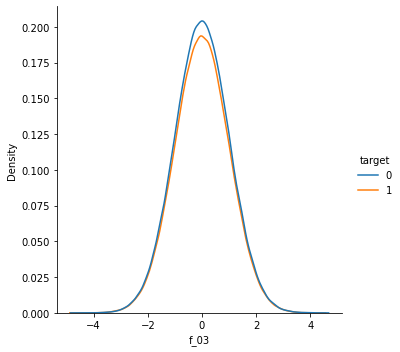

In [20]:
sns.displot(train, x="f_03", hue="target", kind="kde")

In [21]:
X = train.drop(["target","f_27"],axis =1)
y = train["target"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [23]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [24]:
# model = xgbc(n_jobs = -1, n_estimators = 500)
model.fit(X_train,y_train, eval_set=[(X_test,y_test)])

[0]	validation_0-logloss:0.67248
[1]	validation_0-logloss:0.65866
[2]	validation_0-logloss:0.63925
[3]	validation_0-logloss:0.60735
[4]	validation_0-logloss:0.59922
[5]	validation_0-logloss:0.59145
[6]	validation_0-logloss:0.58103
[7]	validation_0-logloss:0.57278
[8]	validation_0-logloss:0.56233
[9]	validation_0-logloss:0.55576
[10]	validation_0-logloss:0.55042
[11]	validation_0-logloss:0.54326
[12]	validation_0-logloss:0.53232
[13]	validation_0-logloss:0.52245
[14]	validation_0-logloss:0.51968
[15]	validation_0-logloss:0.51668
[16]	validation_0-logloss:0.50977
[17]	validation_0-logloss:0.50261
[18]	validation_0-logloss:0.50031
[19]	validation_0-logloss:0.49771
[20]	validation_0-logloss:0.49647
[21]	validation_0-logloss:0.49221
[22]	validation_0-logloss:0.48493
[23]	validation_0-logloss:0.47990
[24]	validation_0-logloss:0.47806
[25]	validation_0-logloss:0.47486
[26]	validation_0-logloss:0.47246
[27]	validation_0-logloss:0.46558
[28]	validation_0-logloss:0.46246
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
val_preds = model.predict_proba(X_test)
y_preds = model.predict_proba(X_train)

print("Train AUC:", roc_auc_score(y_train, y_preds[:,1]))
print("Test AUC:", roc_auc_score(y_test, val_preds[:, 1] ))

Train AUC: 0.9236129479028186
Test AUC: 0.9136852917191484


In [26]:
test.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [27]:
test.columns

Index(['id', 'f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07',
       'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_26', 'f_27', 'f_28', 'f_29', 'f_30'],
      dtype='object')

In [28]:
to_test = test.drop(columns=['f_27'])
sample_submission['target'] = model.predict(to_test)
sample_submission

,id,target
0,900000,1
1,900001,1
2,900002,0
3,900003,0
4,900004,1
...,...,...
699995,1599995,1
699996,1599996,1
699997,1599997,0
699998,1599998,0


In [29]:
sample_submission.to_csv('submission.csv', index=False)